Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics



Don't forget to give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [112]:
# import libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
sns.set()

### a) Importing a csv file [2 pts]

In [280]:
PATH = os.getcwd()+ "/Data/g"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     


df_concatenated  =pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True, sort=False)
df_concatenated.reset_index(drop=True, inplace=True)
df_concatenated["SubjectID"] = df_concatenated.SubjectID.transform(lambda x: x + 7000)


#playing around with display options
pd.set_option('mode.sim_interactive', True) # you can scroll all the data
pd.set_option('expand_frame_repr', True)
#pd.set_option('display.max_rows', len(df_concatenated))


# save concatenated dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'
directory = "./Processed" 
try:
    # Create the Directory
    os.mkdir(directory)
    #if it already exists, function os.mkdir throws an error
except FileExistsError:
   pass
    
df_concatenated.to_csv(DATAPATH)

#Print dataFrame
df_concatenated 

,SubjectID,StimulusType,response,RT
0,7008,1,1,521
1,7008,1,1,237
2,7008,1,1,863
3,7008,1,1,762
4,7008,1,1,923
5,7008,1,1,658
6,7008,1,1,849
7,7008,1,1,657
8,7008,1,1,428
9,7008,1,1,514


### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [184]:
# add a column "congruence"
df_concatenated["congruence"]  = df_concatenated["StimulusType"]==df_concatenated["response" ]


# create a new dataframe with averaged data
key=['SubjectID','StimulusType']
df_concatenated_avg =df_concatenated.groupby(key).mean() #dataFrame.mean() drops null values by default
df_concatenated_avg.drop(["response"], axis=1)


#rename 'congruence' to 'accuracy'
df_concatenated_avg.rename(columns={'congruence':'accuracy'}, inplace=True)
# save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
df_concatenated_avg.to_csv(DATAPATH)

df_concatenated_avg.head()

response        RT  accuracy
SubjectID StimulusType                              
7001      0               0.6000  109.1000    0.4000
          1               0.9875  293.4500    0.9875
7002      0               0.4500  125.4500    0.5500
          1               0.8875  311.6625    0.8875
7003      0               0.0500   19.0500    0.9500

## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

In [302]:
# read data
group_data_path = glob.glob(os.path.join(PATH, "0700*.csv"))
group_data  =pd.concat([pd.read_csv(f) for f in group_data_path], ignore_index=True, sort=False)

,SubjectID,StimulusType,response,RT
0,8,1,1,521
1,8,1,1,237
2,8,1,1,863
3,8,1,1,762
4,8,1,1,923
5,8,1,1,658
6,8,1,1,849
7,8,1,1,657
8,8,1,1,428
9,8,1,1,514


/anaconda3/envs/acc/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


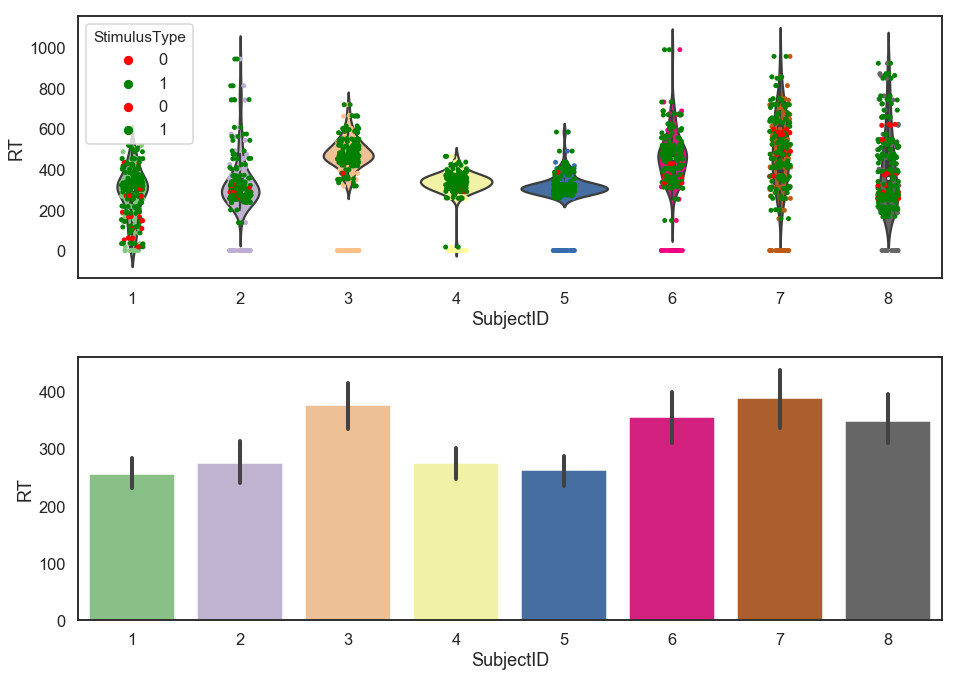

In [312]:
sns.set(context = "talk", style="white", palette="Accent", font_scale=1, rc={'figure.figsize':(20,10)})


plt.subplot(2,1,1)
# stripplot and boxplot
sns.stripplot(data = group_data , x='SubjectID', y='RT')
plt.subplot(2,1,2)
sns.barplot(data = group_data , x='SubjectID', y='RT')
g = np.nonzero(group_data["RT"])

group_data.loc[g] #show row indicies where RT !=0
group_data_plt = group_data.loc[g] # select rows, where RT !=0


#  stripplot and violinplot
plt.subplot(2,1,1)
sns.stripplot(data = group_data_plt , x='SubjectID', y='RT', hue = "StimulusType", palette = {1:"green", 0:"red"}
             )

sns.violinplot(data = group_data_plt , x='SubjectID', y='RT')
sns.stripplot(data = group_data_plt , x='SubjectID', y='RT', hue = "StimulusType", palette = {1:"green", 0:"red"})

# handling legends

#adjusting enviroment
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.1, right=0.7, hspace=0.3,
                   wspace=0.35)
fig.tight_layout()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

In [276]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID
PATH = os.getcwd()+ "/Data/"
#all_files = glob.glob(os.path.join(PATH, "*.csv"))     
group_dirs = os.listdir(PATH)
group_dirs   = group_dirs[1:]

for i in range(2): 
    all_files = glob.glob(os.path.join(PATH+ group_dirs[i], "*.csv")) 
    d = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True,sort=False)
    #d=d.drop(["SubjectID;StimulusType;response;RT","Unnamed: 0"], axis = 1)
    d["SubjectID"] = d.SubjectID.transform(lambda x: x + (i+1)*1000)
    if i==0:
        df_concatenated_all = d
    else:
        df_concatenated_all = pd.concat([df_concatenated,d], ignore_index=True)

df_concatenated_all["congruence"]  = df_concatenated_all["StimulusType"]==df_concatenated_all["response" ]

# create a new dataframe with averaged data
key=['SubjectID','StimulusType']
df_concatenated_avg_all =df_concatenated_all.groupby(key).mean() #dataFrame.mean() drops null values by default
df_concatenated_avg_all.drop(["response"], axis=1)


#rename 'congruence' to 'accuracy'
df_concatenated_avg_all.rename(columns={'congruence':'accuracy'}, inplace=True)
# save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged_all.csv'
df_concatenated_avg_all.to_csv(DATAPATH)


# Now it's time to plot your results
#figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row")

# violin plot for your group's data
#sns.violinplot(data = df_concatenated_avg_all, x='	SubjectID', y='RT', hue = "StimulusType") 

# violin plot of all group's data
#sns.violinplot(data = df_concatenated_avg_all, x='	SubjectID', y='RT', hue = "StimulusType") 
#fig.tight_layout()

Compare two datasets and relate it with CLT. Write your opinion here.

### c) Scatterplot [1 pts]

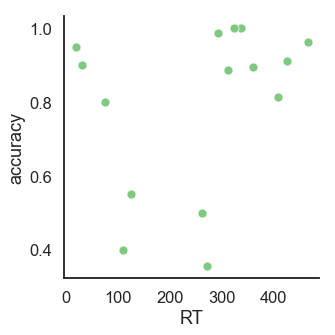

In [279]:
sns.relplot(data = df_concatenated_avg_all, x='RT', y='accuracy')